In [4]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df = pd.read_csv("Fire_Incidents.csv")
# pd.set_option('display.max_rows', None)

/tmp/ipykernel_34767/432313687.py:1: DtypeWarning: Columns (11,12,19,37,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Fire_Incidents.csv")


In [6]:
df

KeyboardInterrupt: 

In [459]:
# df["Received Time"] = df["Received DtTm"]
# df["On Scene Time"] = df["On Scene DtTm"]
df['Time Diff'] = (pd.to_datetime(df["On Scene DtTm"]) - pd.to_datetime(df["Received DtTm"])).astype('timedelta64[m]')


In [460]:
df

,Unit ID,Call Type,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,City,...,Final Priority,ALS Unit,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,Time Diff
19,E33,Structure Fire,04/12/2000,04/12/2000 10:04:42 PM,04/12/2000 10:04:46 PM,04/12/2000 10:04:58 PM,04/12/2000 10:06:03 PM,04/12/2000 10:08:46 PM,NaN,SF,...,3,False,1,ENGINE,1.0,9,11,Oceanview/Merced/Ingleside,"(37.7131720494385, -122.459024434517)",4.0
36,E12,Structure Fire,04/12/2000,04/13/2000 12:19:54 AM,04/13/2000 12:29:24 AM,04/13/2000 12:29:35 AM,04/13/2000 12:31:25 AM,04/13/2000 12:32:36 AM,NaN,SF,...,3,True,1,ENGINE,1.0,5,5,Haight Ashbury,"(37.7651387353822, -122.44763462758)",12.0
75,B04,Structure Fire,04/13/2000,04/13/2000 08:23:42 AM,04/13/2000 08:24:38 AM,04/13/2000 08:24:58 AM,04/13/2000 08:29:52 AM,04/13/2000 08:30:47 AM,NaN,SF,...,3,False,1,CHIEF,3.0,1,3,Chinatown,"(37.796699717573, -122.408014703843)",7.0
76,E02,Structure Fire,04/13/2000,04/13/2000 08:23:42 AM,04/13/2000 08:24:38 AM,04/13/2000 08:24:58 AM,04/13/2000 08:26:25 AM,04/13/2000 08:27:28 AM,NaN,SF,...,3,False,1,ENGINE,1.0,1,3,Chinatown,"(37.796699717573, -122.408014703843)",3.0
79,E37,Structure Fire,04/13/2000,04/13/2000 08:39:10 AM,04/13/2000 08:39:12 AM,04/13/2000 08:39:30 AM,04/13/2000 08:40:38 AM,04/13/2000 08:42:21 AM,NaN,SF,...,3,True,1,ENGINE,1.0,10,10,Potrero Hill,"(37.7521940654679, -122.398452381695)",3.0
83,E01,Structure Fire,04/13/2000,04/13/2000 08:53:31 AM,04/13/2000 08:54:38 AM,04/13/2000 08:54:53 AM,04/13/2000 08:57:10 AM,04/13/2000 09:36:28 AM,NaN,SF,...,3,False,1,ENGINE,1.0,3,6,South of Market,"(37.7777816676305, -122.406629219771)",42.0
98,E01,Structure Fire,04/13/2000,04/13/2000 10:29:54 AM,04/13/2000 10:34:14 AM,04/13/2000 10:34:24 AM,NaN,04/13/2000 10:36:50 AM,NaN,SF,...,3,False,1,ENGINE,1.0,1,6,South of Market,"(37.7857439877905, -122.405831012392)",6.0
104,E33,Structure Fire,04/13/2000,04/13/2000 10:49:54 AM,04/13/2000 10:59:36 AM,04/13/2000 11:00:39 AM,04/13/2000 11:01:26 AM,04/13/2000 11:05:30 AM,NaN,SF,...,3,False,1,ENGINE,1.0,9,11,Excelsior,"(37.7107485232235, -122.447672441304)",15.0
110,E16,Structure Fire,04/13/2000,04/13/2000 11:21:14 AM,04/13/2000 11:21:57 AM,04/13/2000 11:22:35 AM,04/13/2000 11:23:55 AM,04/13/2000 11:24:16 AM,NaN,SF,...,3,False,1,ENGINE,1.0,4,2,Marina,"(37.8011575150768, -122.429637224953)",3.0
130,E16,Structure Fire,04/13/2000,04/13/2000 12:39:54 PM,04/13/2000 12:42:08 PM,04/13/2000 12:43:03 PM,04/13/2000 12:44:18 PM,04/13/2000 12:46:40 PM,NaN,SF,...,3,False,1,ENGINE,2.0,1,2,Russian Hill,"(37.803363322315, -122.424107741649)",6.0


In [461]:
df.dtypes[:]

Unit ID                                  object
Call Type                                object
Watch Date                               object
Received DtTm                            object
Entry DtTm                               object
Dispatch DtTm                            object
Response DtTm                            object
On Scene DtTm                            object
Transport DtTm                           object
City                                     object
Zipcode of Incident                     float64
Battalion                                object
Station Area                            float64
Box                                     float64
Original Priority                         int64
Priority                                  int64
Final Priority                            int64
ALS Unit                                   bool
Number of Alarms                          int64
Unit Type                                object
Unit sequence in call dispatch          

In [462]:
columns_to_drop = ["Call Type", "Watch Date", "Received DtTm", "Entry DtTm", "Dispatch DtTm", "Response DtTm",
                   "On Scene DtTm", "Transport DtTm", "City", "Unit sequence in call dispatch", "Location",
                   "Neighborhooods - Analysis Boundaries", "ALS Unit", "Original Priority", "Priority", "Final Priority", "Number of Alarms"]
df = df.drop(columns_to_drop, axis=1)

In [463]:
df

,Unit ID,Zipcode of Incident,Battalion,Station Area,Box,Unit Type,Fire Prevention District,Supervisor District,Time Diff
19,E33,94112.0,B09,33.0,8374.0,ENGINE,9,11,4.0
36,E12,94117.0,B05,12.0,5151.0,ENGINE,5,5,12.0
75,B04,94133.0,B01,2.0,1332.0,CHIEF,1,3,7.0
76,E02,94133.0,B01,2.0,1332.0,ENGINE,1,3,3.0
79,E37,94107.0,B10,37.0,2565.0,ENGINE,10,10,3.0
83,E01,94103.0,B03,27.0,2313.0,ENGINE,3,6,42.0
98,E01,94103.0,B03,1.0,1322.0,ENGINE,1,6,6.0
104,E33,94112.0,B09,33.0,6211.0,ENGINE,9,11,15.0
110,E16,94123.0,B04,16.0,3341.0,ENGINE,4,2,3.0
130,E16,94109.0,B01,4.0,314.0,ENGINE,1,2,6.0


In [464]:
df = df.dropna()

In [465]:
df

,Unit ID,Zipcode of Incident,Battalion,Station Area,Box,Unit Type,Fire Prevention District,Supervisor District,Time Diff
19,E33,94112.0,B09,33.0,8374.0,ENGINE,9,11,4.0
36,E12,94117.0,B05,12.0,5151.0,ENGINE,5,5,12.0
75,B04,94133.0,B01,2.0,1332.0,CHIEF,1,3,7.0
76,E02,94133.0,B01,2.0,1332.0,ENGINE,1,3,3.0
79,E37,94107.0,B10,37.0,2565.0,ENGINE,10,10,3.0
83,E01,94103.0,B03,27.0,2313.0,ENGINE,3,6,42.0
98,E01,94103.0,B03,1.0,1322.0,ENGINE,1,6,6.0
104,E33,94112.0,B09,33.0,6211.0,ENGINE,9,11,15.0
110,E16,94123.0,B04,16.0,3341.0,ENGINE,4,2,3.0
130,E16,94109.0,B01,4.0,314.0,ENGINE,1,2,6.0


In [466]:
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns
cat_columns


Index(['Unit ID', 'Battalion', 'Unit Type', 'Fire Prevention District'], dtype='object')

In [467]:
float_columns = df.select_dtypes(["float64"]).columns
float_columns

Index(['Zipcode of Incident', 'Station Area', 'Box', 'Time Diff'], dtype='object')

In [468]:
df[float_columns] = df[float_columns].astype(int)
df.to_csv("test.csv", index=False)

/tmp/ipykernel_21442/2238863404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[float_columns] = df[float_columns].astype(int)


In [472]:
df[float_columns]

,Zipcode of Incident,Station Area,Box,Time Diff
19,94112,33,8374,4
36,94117,12,5151,12
75,94133,2,1332,7
76,94133,2,1332,3
79,94107,37,2565,3
83,94103,27,2313,42
98,94103,1,1322,6
104,94112,33,6211,15
110,94123,16,3341,3
130,94109,4,314,6


In [473]:
# columns = [cat_columns, float_columns]
tips_categorical = df[cat_columns]

In [474]:

tips_categorical

,Unit ID,Battalion,Unit Type,Fire Prevention District
19,E33,B09,ENGINE,9
36,E12,B05,ENGINE,5
75,B04,B01,CHIEF,1
76,E02,B01,ENGINE,1
79,E37,B10,ENGINE,10
83,E01,B03,ENGINE,3
98,E01,B03,ENGINE,1
104,E33,B09,ENGINE,9
110,E16,B04,ENGINE,4
130,E16,B01,ENGINE,1


In [475]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = min(crosstab.shape) - 1  # Take the minimum value between the columns and the rows of the cross table
    return (stat / (obs * mini))

In [476]:
rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(tips_categorical[var1], tips_categorical[var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns)

In [477]:
df

,Unit ID,Battalion,Unit Type,Fire Prevention District
Unit ID,1.00,0.77,1.00,0.73
Battalion,0.77,1.00,0.08,0.88
Unit Type,1.00,0.08,1.00,0.07
Fire Prevention District,0.73,0.88,0.07,1.00


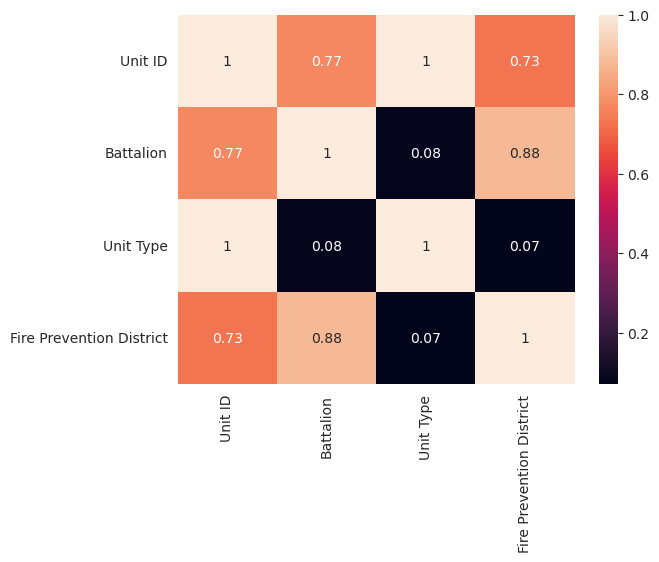

In [478]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))

# setting the parameter values
annot = True

# plotting the heatmap
hm = sns.heatmap(data=df,
                 annot=annot)

# displaying the plotted heatmap
plt.show()

In [479]:
df = pd.read_csv("test.csv")

In [480]:
df

,Unit ID,Zipcode of Incident,Battalion,Station Area,Box,Unit Type,Fire Prevention District,Supervisor District,Time Diff
19,E33,94112,B09,33,8374,ENGINE,9,11,4
36,E12,94117,B05,12,5151,ENGINE,5,5,12
75,B04,94133,B01,2,1332,CHIEF,1,3,7
76,E02,94133,B01,2,1332,ENGINE,1,3,3
79,E37,94107,B10,37,2565,ENGINE,10,10,3
83,E01,94103,B03,27,2313,ENGINE,3,6,42
98,E01,94103,B03,1,1322,ENGINE,1,6,6
104,E33,94112,B09,33,6211,ENGINE,9,11,15
110,E16,94123,B04,16,3341,ENGINE,4,2,3
130,E16,94109,B01,4,314,ENGINE,1,2,6


In [481]:
cat_columns

Index(['Unit ID', 'Battalion', 'Unit Type', 'Fire Prevention District'], dtype='object')

In [482]:
df[['Unit ID', 'Battalion', 'Unit Type', 'Fire Prevention District']] = df[['Unit ID', 'Battalion', 'Unit Type', 'Fire Prevention District']].apply(lambda x: pd.factorize(x)[0])

In [483]:
df

,Unit ID,Zipcode of Incident,Battalion,Station Area,Box,Unit Type,Fire Prevention District,Supervisor District,Time Diff
19,0,94112,0,33,8374,0,0,11,4
36,1,94117,1,12,5151,0,1,5,12
75,2,94133,2,2,1332,1,2,3,7
76,3,94133,2,2,1332,0,2,3,3
79,4,94107,3,37,2565,0,3,10,3
83,5,94103,4,27,2313,0,4,6,42
98,5,94103,4,1,1322,0,2,6,6
104,0,94112,0,33,6211,0,0,11,15
110,6,94123,5,16,3341,0,5,2,3
130,6,94109,2,4,314,0,2,2,6


<AxesSubplot:>

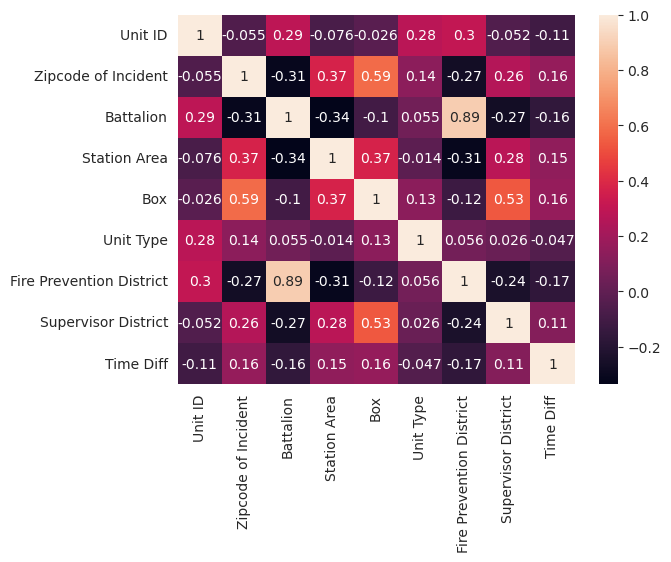

In [484]:
corr = df.corr(method='pearson', min_periods=1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [358]:
df

,Unnamed: 0,Unit ID,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,Number of Alarms,Unit Type,Fire Prevention District,Supervisor District,Time Diff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,1,1,1
2,2,2,2,2,2,2,0,0,0,0,1,2,2,2
3,3,3,2,2,2,2,0,0,0,0,0,2,2,3
4,4,4,3,3,3,3,0,0,0,0,0,3,3,3
5,5,5,4,4,4,4,0,0,0,0,0,4,4,4
6,6,5,4,4,5,5,0,0,0,0,0,2,4,5
7,7,0,0,0,0,6,0,0,0,0,0,0,0,6
8,8,6,5,5,6,7,0,0,0,0,0,5,5,3
9,9,6,6,2,7,8,0,0,0,0,0,2,5,5
